<a href="https://colab.research.google.com/github/Noam-shahar/AI-course/blob/main/HW4_Fashion_MNIST_Dataset_Classification_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to prompts: https://chat.openai.com/share/1eecc4b5-037d-41b7-87c0-ad5b1cd928cb

Epoch 1/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.3983 - accuracy: 0.8569
Epoch 2/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2597 - accuracy: 0.9046
Epoch 3/5
1875/1875 [==============================] - 84s 45ms/step - loss: 0.2140 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1788 - accuracy: 0.9333
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 0.2636 - accuracy: 0.9165
Test accuracy: 0.9164999723434448
1/1 [==============================] - 0s 31ms/step


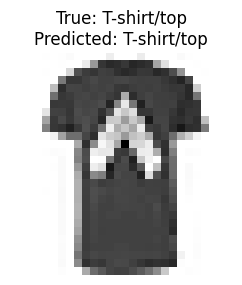

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_dataset, test_dataset), info = tfds.load('fashion_mnist', split=['train', 'test'], as_supervised=True, with_info=True)

# Normalize pixel values to be between 0 and 1
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Normalize the datasets
train_dataset = train_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

# Build the Convolutional Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare datasets for training and testing
BATCH_SIZE = 32
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Train the model
model.fit(train_dataset, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test accuracy:', test_accuracy)

# Visualize predictions on 5 test images
plt.figure(figsize=(12, 6))
for image, label in test_dataset.take(5):
    predictions = model.predict(image)
    predicted_class = tf.argmax(predictions, axis=1).numpy()[0]

    plt.subplot(1, 5, i + 1)
    plt.imshow(image[0], cmap='binary')
    plt.title(f'True: {info.features["label"].int2str(label[0].numpy())}\nPredicted: {info.features["label"].int2str(predicted_class)}')
    plt.axis('off')

plt.tight_layout()
plt.show()
